直方图
===
直方图显示了不同数值的像素出现的次数

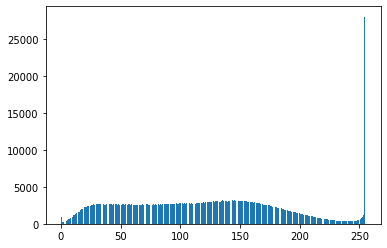

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image
img = cv2.imread("Images/01/09/02.jpg").astype(np.float)

# Display histogram
plt.hist(img.ravel(), bins=255, rwidth=0.8, range=(0, 255))
# plt.savefig("out.png")
plt.show()

# 2.直方图归一化(Histogram Normalization)

有时候直方图会偏向一边，比如说，数据集中在0处（左侧）的图像全体会偏暗，数据集中在255处（右侧）的图像会偏亮。为了使人能更清楚地看见图片，让直方图归一化、平坦化是十分必要的。这种归一化直方图的操作被称作灰度变换(Grayscale Transformation)。像素点取值范围从$[c,d]$转换到$[a,b]$的过程由下式定义。
$$
x_{out}=
\begin{cases}
a& (\text{if}\quad x_{in}<c) \\\\
\frac{b-a}{d-c}\ (x_{in}-c)+a&(\text{else if}\quad c\leq x_{in}<d) \\\\
b&(\text{else})
\end{cases}
$$

(array([  911.,   204.,   251.,   295.,   357.,   458.,   590.,   651.,
          850.,   985.,  1171.,  1228.,  1379.,  1516.,  1587.,  1665.,
         1852.,  2019.,  2012.,  2221.,  2237.,  2315.,  2427.,  2382.,
         2457.,  2565.,  2550.,  2720.,  2598.,  2621.,  2671.,  2717.,
         2665.,  2709.,  2757.,  2733.,  2503.,  2565.,  2663.,  2650.,
         2703.,  2646.,  2624.,  2603.,  2621.,  2696.,  2623.,  2591.,
         2663.,  2595.,  2600.,  2622.,  2703.,  2574.,  2618.,  2611.,
         2626.,  2708.,  2611.,  2643.,  2583.,  2574.,  2585.,  2509.,
         2589.,  2587.,  2560.,  2507.,  2680.,  2551.,  2575.,  2620.,
         2698.,  2604.,  2594.,  2587.,  2567.,  2671.,  2589.,  2701.,
         2589.,  2738.,  2603.,  2661.,  2591.,  2687.,  2691.,  2710.,
         2619.,  2669.,  2665.,  2738.,  2702.,  2680.,  2678.,  2664.,
         2785.,  2691.,  2727.,  2760.,  2789.,  2758.,  2717.,  2767.,
         2729.,  2865.,  2816.,  2787.,  2743.,  2765.,  2679., 

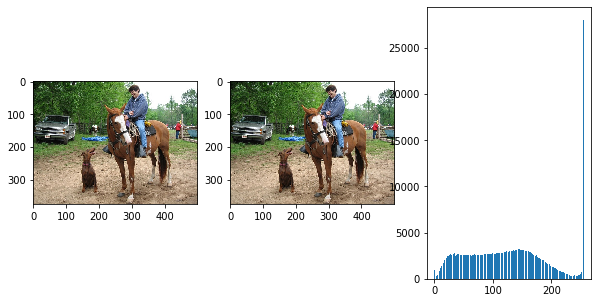

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image
img = cv2.imread("Images/01/09/02.jpg")
H, W, C = img.shape
a = 0
b = 255
c = img.min()
d = img.max()
out = img.copy()
out = (b-a) / (d - c) * (out - c) + a
out[out < a] = a
out[out > b] = b
out = out.astype(np.uint8)

plt.figure(figsize=(10,5), facecolor='w')
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 3)
plt.hist(out.ravel(), bins=255, rwidth=0.8, range=(0, 255))

# 3.直方图操作

让直方图的平均值$m_0=128$，标准差$s_0=52$，可以使得直方图变得平坦。可以使用下式将平均值为$m$标准差为$s$的直方图变成平均值为$m_0$标准差为$s_0$的直方图
$$
\begin{align*}
x_{out}=\frac{s_0}{s}(x_{in}-m)+m_0
\end{align*}
$$

(array([    0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   911.,   455.,   295.,   357.,   458.,  1241.,   850.,
          985.,  1171.,  2607.,  1516.,  1587.,  3517.,  2019.,  2012.,
         2221.,  4552.,  2427.,  2382.,  2457.,  5115.,  2720.,  2598.,
         2621.,  5388.,  2665.,  2709.,  2757.,  5236.,  2565.,  2663.,
         2650.,  5349.,  2624.,  2603.,  2621.,  5319.,  2591.,  2663.,
         2595.,  5222.,  2703.,  2574.,  2618.,  5237.,  2708.,  2611.,
         2643.,  5157.,  2585.,  2509.,  2589.,  5147.,  2507.,  2680.,
         2551.,  5195.,  2698.,  2604.,  2594.,  5154.,  2671.,  2589.,
         2701.,  5327.,  2603.,  2661.,  2591.,  5378.,  2710.,  2619.,
         2669.,  5403.,  2702.,  2680.,  5342.,  2785.,  2691., 

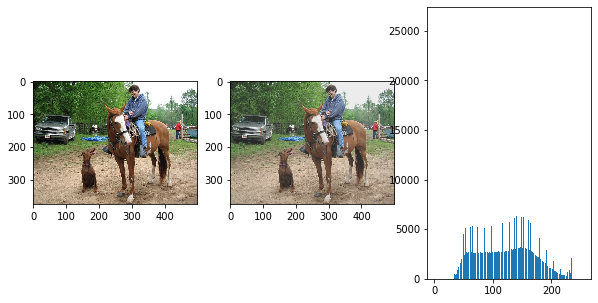

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image
img = cv2.imread("Images/01/09/02.jpg")
H, W, C = img.shape
m = np.mean(img)
s = np.std(img)
out = img.copy()
out = 52 / s * (out - m) + 128
out[out < 0] = 0
out[out > 255] = 255
out = out.astype(np.uint8)

plt.figure(figsize=(10,5), facecolor='w')
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 3)
plt.hist(out.ravel(), bins=255, rwidth=0.8, range=(0, 255))

# 4.直方图均衡化(Histogram Equalization)

直方图均衡化是使直方图变得平坦的操作，并且不需要计算平均值、标准差。均衡化操作由以下式子定义。$S$是总的像素数；$Z_{max}$是像素点的最大取值（在这里是255）；$h(z)$表示取值为$z$的累积分布函数：
$$Z' = \frac{Z_{max}}{S} \  \sum\limits_{i=0}^z\ h(i)$$

(array([ 3066.,  1501.,  2156.,  2607.,  1516.,  3252.,  1852.,  2019.,
         2012.,  2221.,  2237.,  2315.,  2427.,  2382.,     0.,  2457.,
         2565.,  2550.,  2720.,  2598.,  2621.,     0.,  2671.,  2717.,
         2665.,  2709.,     0.,  2757.,  2733.,  2503.,  2565.,  2663.,
            0.,  2650.,  2703.,  2646.,  2624.,  2603.,  2621.,     0.,
         2696.,  2623.,  2591.,  2663.,  2595.,     0.,  2600.,  2622.,
         2703.,  2574.,  2618.,     0.,  2611.,  2626.,  2708.,  2611.,
         2643.,     0.,  2583.,  2574.,  2585.,  2509.,  2589.,  2587.,
            0.,  2560.,  2507.,  2680.,  2551.,  2575.,  2620.,     0.,
         2698.,  2604.,  2594.,  2587.,  2567.,     0.,  2671.,  2589.,
         2701.,  2589.,  2738.,     0.,  2603.,  2661.,  2591.,  2687.,
         2691.,     0.,  2710.,  2619.,  2669.,  2665.,  2738.,     0.,
         2702.,  2680.,  2678.,  2664.,     0.,  2785.,  2691.,  2727.,
         2760.,     0.,  2789.,  2758.,  2717.,  2767.,  2729., 

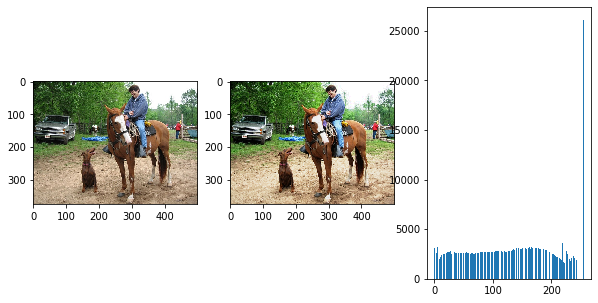

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread("Images/01/09/02.jpg")

# region
H, W, C = img.shape
S = H * W * C * 1
out = img.copy()
sum_h = 0

for i in range(1, 255):
    ind = np.where(img == i)
    sum_h += len(img[ind])
    z_prime = 255 / S * sum_h
    out[ind] = z_prime

out = out.astype(np.uint8)
# endregion

plt.figure(figsize=(10,5), facecolor='w')
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 3)
plt.hist(out.ravel(), bins=255, rwidth=0.8, range=(0, 255))